In [1]:
import sys
sys.path.insert(0,"src")
import nupack as n
import numpy as np
import matplotlib.pyplot as plt
import GA_util
import util
import pandas as pd
import nupack as n
import tensorflow as tf
import agreement
tfk = tf.keras
print('loaded')




loaded


In [2]:
RED = '#C62626'
BLUE = '#2E9AD6'

plt.rcParams.update({'font.size': 10,'font.family':'Helvetica'})
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica:bold'

In [3]:
######## UTR Analysis  ########



utrs = pd.read_csv('data/UTR_data/designed_library.csv')
utrs.head()

high_exp = utrs[utrs['rl'] > 8.5]
print(high_exp.shape)
low_exp = utrs[utrs['rl'] < 1.2]
print(low_exp.shape)



# mod = n.Model(material='rna06')
mod = n.Model()


utrs.head()

(120, 42)
(124, 42)


/var/folders/8c/n_q459w55tq87t1kfxnp8hrr0000gn/T/ipykernel_22284/2122571342.py:5: DtypeWarning: Columns (33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  utrs = pd.read_csv('data/UTR_data/designed_library.csv')


,Unnamed: 0,utr,0,1,2,3,4,5,6,7,...,rl,id,info1,info2,info3,info4,library,mother,designed,match_score
0,0,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,1763,1880,2154,2959,2122,1896,2618,1899,...,4.823082,NC_000012.12:g.4911352C>T,rs886049508,chr12:4911298-4911381,snv,normal,snv,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,True,0.0
1,2,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,1108,1317,774,1201,1813,2011,3340,2454,...,6.252208,8527,ENSG00000105492,ENST00000343300,-,-,human_utrs,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,True,0.0
2,3,CCCTGATAACTGAATTGTTGTTTGTTTTATTTGTATTGTTGTTTGT...,918,894,523,782,877,999,1436,1799,...,7.499574,3409,20,8.81778335571289,-,-,target_no_uaug_allow_stop,CCCTGATAACTGAATTGTTGTTTGTTTTATTTGTATTGTTGTTTGT...,True,0.0
3,4,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,1439,1468,1322,1890,1347,1287,2007,2121,...,5.835379,8772,ENSG00000124570,ENST00000335686,-,-,human_utrs,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,True,0.0
4,5,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,952,876,854,1675,2170,1825,2585,1385,...,5.433105,6322,ENSG00000149932,ENST00000279396,-,-,human_utrs,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,True,0.0


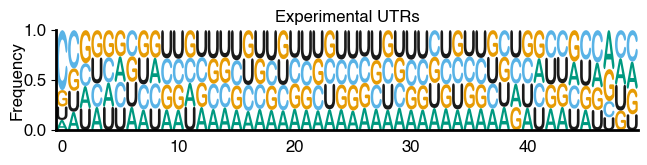

In [4]:
import logomaker
encoded_experimental = util.one_hot_encode(utrs[['utr']])


fs = [7.5,1.3]
plt.rcParams.update({'font.size': 12})
plt.hfont = {'fontname':'Helvetica'}
util.plot_logo(encoded_experimental,title='Experimental UTRs',figsize=fs)
# plt.savefig('figures/utr_sequence_composition_test.png',dpi=500,bbox_inches='tight',pad_inches=0.5,transparent=True)
# plt.savefig('figures/seq_logos/utr_sequence_composition_test.svg',transparent=True)

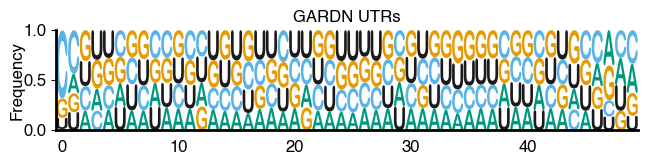

In [35]:
import tensorflow as tf
utr_gan = tf.keras.models.load_model('models/UTR_generator_2022-07-28/')

rands = tf.random.normal((1000,128))
gan_utrs_basic = utr_gan(rands)

fs = [7.5,1.3]
plt.rcParams.update({'font.size': 12})
plt.hfont = {'fontname':'Helvetica'}

util.plot_logo(gan_utrs_basic,title='GARDN UTRs',figsize=fs)
# plt.savefig('figures/seq_logos/utr_gardn_sequence_composition.png',dpi=500,bbox_inches='tight',pad_inches=0.5,transparent=True)
# plt.savefig('figures/seq_logos/utr_gardn_sequence_composition.svg',transparent=True)

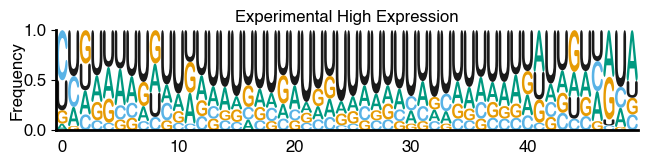

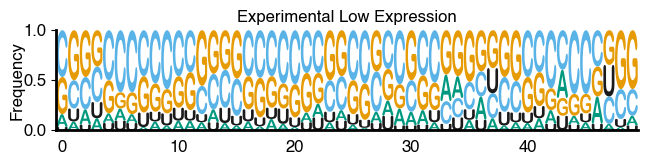

In [91]:
util.plot_logo(util.one_hot_encode(high_exp[['utr']]),title='Experimental High Expression',figsize=fs)
# plt.savefig('figures/seq_logos/new_experimental_high_sequences.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)
util.plot_logo(util.one_hot_encode(low_exp[['utr']]),title='Experimental Low Expression',figsize=fs)
# plt.savefig('figures/seq_logos/new_experimental_low_sequences.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)
# 

In [97]:
designed_utrs = pd.read_csv('data/sequence_experiments/UTR_big_sequence_experiments.csv')
# designed_utrs.head()


designed_utrs_high = designed_utrs[designed_utrs['Target_Value'] == 'UTR_high']
designed_utrs_low = designed_utrs[designed_utrs['Target_Value'] == 'UTR_low']

In [98]:
designed_utrs.head()

,Unnamed: 0,Pre_Optimized_Sequence,Post_Optimized_Sequence,Pre_Optimized_Value,Post_Optimized_Value,Target_Value,Delta
0,0,CGGTCCAATAACCGGACAGACCTGCCATCACTGGTACCCTCCCCCC...,CGGACCCGTCGCCGGCCAGCCCGGCAATCACTGGTACCCTCCGCTG...,6.328138,3.786939,UTR_low,-2.541199
1,1,CCCTTGGCGCCCGGGCTCGCGGGCACGACCGAACCGTGGTTACGAA...,GCCCTGCCGCCGGGGGCGGCGGGCACGAGCGAGCCGAGGTCACGGA...,5.374848,4.043102,UTR_low,-1.331746
2,2,CGCCGCTCCAAATCGTCGTGTAAGAAAAGGTTGATTTTAGGATTGT...,CGCCGCTGCGGATCGGCGTGTGGGAAAAGGAGGGCTCCGGGGGTGC...,7.229707,5.480308,UTR_low,-1.749399
3,3,CTTAAAGTAAGTATTTGAACATTCGTTAGTACCTGTGCTAAATCGG...,CCAGACGCGGGCCTGCGAACACCCGCCGGCACCTGTGAGACCCCGG...,6.729163,5.440332,UTR_low,-1.288831
4,4,CCCCTGCATACTCCATTACCACCTATTCACCTATTTGTTCGGCAGG...,CCCCTCCGCCCCCGAGGGCCACCTACCCCCCCGGCCGCGCGGCCGG...,6.842861,4.013494,UTR_low,-2.829366


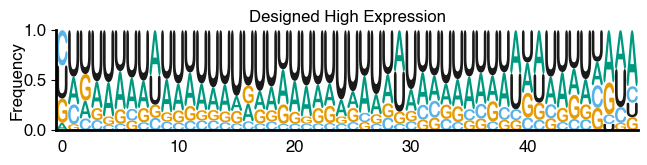

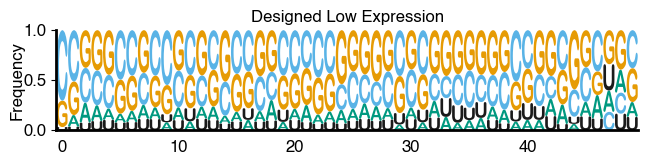

In [99]:
util.plot_logo(util.one_hot_encode(designed_utrs_high[['Post_Optimized_Sequence']]),title='Designed High Expression',figsize=fs)
# plt.savefig('figures/seq_logos/new_act_max_high_performance_seqs.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)

util.plot_logo(util.one_hot_encode(designed_utrs_low[['Post_Optimized_Sequence']]),title='Designed Low Expression',figsize=fs)
# plt.savefig('figures/seq_logos/new_act_max_low_performance_seqs.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)


5.789302721023559
4.993811825871467


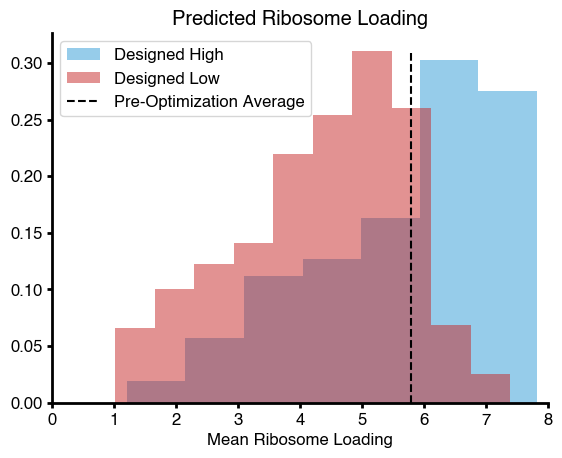

In [100]:
plt.figure()
plt.rcParams.update({'font.size': 12,'font.family':'Helvetica'})
plt.hist(designed_utrs_high['Post_Optimized_Value'].values,color=BLUE,alpha=0.5,density=True,cumulative=False,label='Designed High')
plt.hist(designed_utrs_low['Post_Optimized_Value'].values,color=RED,alpha=0.5,density=True,cumulative=False,label='Designed Low')
plt.axvline(np.mean(designed_utrs['Pre_Optimized_Value']),ymax=0.95,linestyle='--',color='black',label='Pre-Optimization Average',)
plt.legend()
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2)
plt.subplot().spines['bottom'].set_linewidth(2)
plt.gca().xaxis.set_tick_params(width=2)
plt.gca().yaxis.set_tick_params(width=2)

plt.xlabel('Mean Ribosome Loading')
plt.xlim([0,8])
plt.title('Predicted Ribosome Loading')
# plt.savefig('figures/act max scores.svg')


print(np.mean(designed_utrs['Pre_Optimized_Value']))
print(np.mean(designed_utrs['Post_Optimized_Value']))



In [101]:
window_size = 20



high_exp_energies = agreement.calc_sliding_structure_window(high_exp[['utr']],window_size=window_size,model=mod)
low_exp_energies = agreement.calc_sliding_structure_window(low_exp[['utr']],window_size=window_size,model=mod)


 
# energies = calc_sliding_structure_window(x,window_size=window_size,model=mod)
# mean_energy_list = np.mean(energies,axis=2)

In [102]:

designed_high_mfes = [n.mfe(seq,mod)[0].energy for i,seq in enumerate(designed_utrs_high['Post_Optimized_Sequence'])]
designed_low_mfes = [n.mfe(seq,mod)[0].energy for i,seq in enumerate(designed_utrs_low['Post_Optimized_Sequence'])]

exp_high_mfes = [n.mfe(seq,mod)[0].energy for i,seq in enumerate(high_exp['utr'])]
exp_low_mfes = [n.mfe(seq,mod)[0].energy for i,seq in enumerate(low_exp['utr'])]

In [103]:
from scipy.stats import ttest_ind

<Figure size 700x700 with 0 Axes>

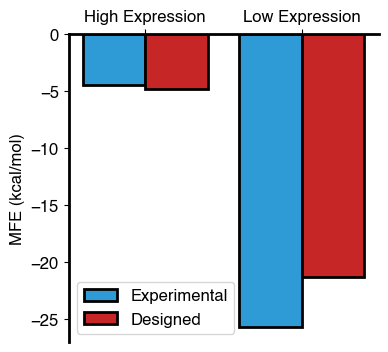

In [104]:
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 12})
plt.hfont = {'fontname':'Helvetica'}

plt.rcParams.update({'xtick.bottom':False,'xtick.labelbottom':False})
plt.rcParams.update({'xtick.top':True,'xtick.labeltop':True})

plt.figure(figsize=[4,4])
plt.bar([0,0.5],[np.mean(exp_high_mfes),np.mean(exp_low_mfes)],color=BLUE,width=0.2,linewidth=2,alpha=1,label='Experimental',edgecolor='black')

plt.bar([0.2,0.7],[np.mean(designed_high_mfes),np.mean(designed_low_mfes)],color=RED,width=0.2,linewidth=2,alpha=1,label='Designed',edgecolor='black')





plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_linewidth(2.0)
plt.subplot().spines['left'].set_linewidth(2.0)
plt.subplot().spines['bottom'].set_visible(False)
plt.xticks([0.1,0.6],labels=['High Expression','Low Expression'],rotation=0)
plt.ylabel('MFE (kcal/mol)')
plt.legend()
# plt.savefig('figures/mfe_bar_chart.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)



#Undoing this for all following figures
plt.rcParams.update({'xtick.bottom':True,'xtick.labelbottom':True})
plt.rcParams.update({'xtick.top':False,'xtick.labeltop':False})


In [107]:
designed_high_energies = agreement.calc_sliding_structure_window(designed_utrs_high[['Post_Optimized_Sequence']],window_size=window_size,model=mod)
designed_low_energies = agreement.calc_sliding_structure_window(designed_utrs_low[['Post_Optimized_Sequence']],window_size=window_size,model=mod)



In [108]:
#Heatmap of correlation between low and high experimental and 
from scipy.stats import spearmanr
from sklearn.metrics import r2_score

energy_matrix = pd.DataFrame({'Designed High':np.mean(designed_high_energies,axis=0),'Designed Low':np.mean(designed_low_energies,axis=0),'Experimental High':np.mean(high_exp_energies,axis=0),'Experimental Low':np.mean(low_exp_energies,axis=0)})

grid = energy_matrix.corr(method='spearman')
# grid = abs(grid)

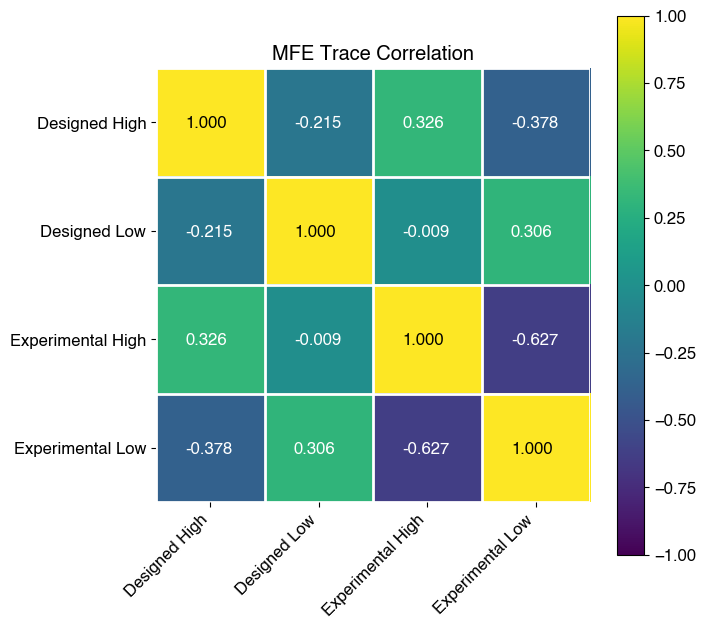

In [109]:
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 12})
plt.hfont = {'fontname':'Helvetica'}


im = plt.imshow(grid,
                interpolation='none', vmin=-1, vmax=1, aspect='equal')

jump = np.arange(-.5, 4, 1)
jump_int = np.arange(0,4,1)

for i in jump_int:
    for j in jump_int:
        if i ==j:
            color = 'black'
        else:
            color = 'white'
        plt.text(x=jump[i]+0.27,y=jump[j]+0.55,s='%.3f'%grid.iloc[i,j],color=color)
    
    

plt.colorbar()

ax = plt.gca();
ax.set_title('MFE Trace Correlation')
# # Major ticks
ax.set_xticks(np.arange(0, 4, 1))
ax.set_yticks(np.arange(0, 4, 1))

# # Labels for major ticks
ax.set_xticklabels(['Designed High','Designed Low','Experimental High','Experimental Low'],rotation=45,ha='right')
ax.set_yticklabels(['Designed High','Designed Low','Experimental High','Experimental Low'])

# # # Minor ticks
ax.set_xticks(np.arange(-.5, 4, 1), minor=True)
ax.set_yticks(np.arange(-.5, 4, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# # Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)
ax.spines['left'].set_color('white')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plt.savefig('figures/Structural Trace Correlation.png',dpi=500,bbox_inches='tight',pad_inches=0.5)
# plt.savefig('figures/Structural Trace Correlation.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)

In [110]:
encoded_designed_high = util.one_hot_encode(designed_utrs_high[['Post_Optimized_Sequence']])
encoded_designed_low = util.one_hot_encode(designed_utrs_low[['Post_Optimized_Sequence']])

designed_high_defects = agreement.return_defects(encoded_designed_high,mod)
designed_low_defects = agreement.return_defects(encoded_designed_low,mod)


experimental_high_defects = agreement.return_defects(util.one_hot_encode(high_exp[['utr']]),mod)
experimental_low_defects = agreement.return_defects(util.one_hot_encode(low_exp[['utr']]),mod)

<Figure size 1400x700 with 0 Axes>

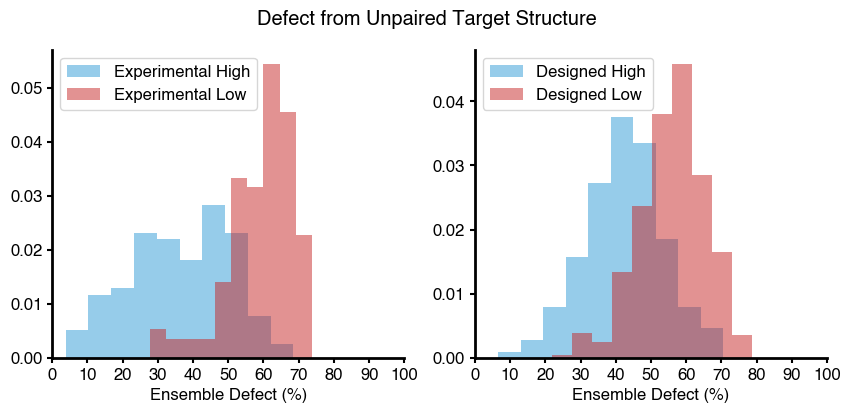

In [111]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size': 12})
plt.hfont = {'fontname':'Helvetica'}

plt.figure(figsize=(10,4))
plt.suptitle('Defect from Unpaired Target Structure')

plt.subplot(1,2,1)
plt.hist(experimental_high_defects*100,density=True,color=BLUE,alpha=0.5)
plt.hist(experimental_low_defects*100,density=True,color=RED,alpha=0.5)
plt.xlabel('Ensemble Defect (%)')
plt.subplot(1,2,1).spines['right'].set_visible(False)
plt.subplot(1,2,1).spines['top'].set_visible(False)
plt.subplot(1,2,1).spines['bottom'].set_linewidth(2.0)
plt.subplot(1,2,1).spines['left'].set_linewidth(2.0)
plt.subplot(1,2,1).xaxis.set_tick_params(width=1.5)
plt.subplot(1,2,1).yaxis.set_tick_params(width=1.5)
plt.xlim([0,1])
plt.xticks([i*10 for i in range(11)],labels=[i*10 for i in range(11)])
plt.legend(['Experimental High','Experimental Low'],loc='upper left')

plt.subplot(1,2,2)
plt.hist(designed_high_defects*100,density=True,color=BLUE,alpha=0.5)
plt.hist(designed_low_defects*100,density=True,color=RED,alpha=0.5)
plt.xlabel('Ensemble Defect (%)')
plt.subplot(1,2,2).spines['right'].set_visible(False)
plt.subplot(1,2,2).spines['top'].set_visible(False)
plt.subplot(1,2,2).spines['bottom'].set_linewidth(2.0)
plt.subplot(1,2,2).spines['left'].set_linewidth(2.0)
plt.subplot(1,2,2).xaxis.set_tick_params(width=1.5)
plt.subplot(1,2,2).yaxis.set_tick_params(width=1.5)
plt.xlim([0,1])
plt.xticks([i*10 for i in range(11)],labels=[i*10 for i in range(11)])

plt.legend(['Designed High','Designed Low'],loc='upper left')



# plt.savefig('figures/ensemble_defect_distributions.svg',transparent=True)

In [23]:
######## Toehold Switch Analysis ##############

generator = tf.keras.models.load_model('models/toehold_generator_2023-04-19')





# generator_seqs = pd.read_csv('data/sequence_experiments/
gardn_seqs = pd.read_csv('data/sequence_experiments/GARDN_optimized_toeholds_on_april_21.csv')
act_max_seqs = pd.read_csv('data/sequence_experiments/trivial_act_max.csv')
constrained_act_max_seqs = pd.read_csv('data/sequence_experiments/constrained_act_max.csv')
nupack_seqs = np.load('data/sequence_experiments/nupack_generated_sequences.npy')

import pandas as pd
data = pd.read_csv('data/toehold_data/Toehold_Dataset_Final_2019-10-23.csv')

data = data[data['ON'].notna()]
data = data[data['OFF'].notna()]

#Encode the sequences, and add the constant 5' C from the linker to sequences of length 59
gardn_pre_seqs = util.one_hot_encode(gardn_seqs[['Pre_Optimized_Sequence']])
# gardn_post_seqs = util.one_hot_encode(gardn_seqs[gardn_seqs['Post_Optimized_Value'] >= 0.90][['Post_Optimized_Sequence']])
gardn_post_seqs = util.one_hot_encode(gardn_seqs[['Post_Optimized_Sequence']])


trivial_act_max_seqs = util.one_hot_encode(act_max_seqs[['Post_Optimized_Sequence']])
constrained_act_max_seqs = util.one_hot_encode(constrained_act_max_seqs[['Post_Optimized_Sequence']])

collins_seqs = util.one_hot_encode(data[['switch','loop2','stem1','atg','stem2']])

#Add the constant 'C' from the linker for standardization
# print(idx)
collins_seqs = np.concatenate((GA_util.create_C_stack(collins_seqs.shape[0]),collins_seqs),axis=2)
nupack_seqs = np.concatenate((GA_util.create_C_stack(nupack_seqs.shape[0]),nupack_seqs),axis=2)

trivial_act_max_seqs = np.concatenate((GA_util.create_C_stack(trivial_act_max_seqs.shape[0]),trivial_act_max_seqs),axis=2)
constrained_act_max_seqs = np.concatenate((GA_util.create_C_stack(constrained_act_max_seqs.shape[0]),constrained_act_max_seqs),axis=2)

In [24]:
#optimal toehold switch structure
struc = '.............(((((((((...((((((...........))))))...)))))))))'

In [30]:
gardn_seqs.shape

(300, 7)

Text(0.0, 1.0, 'NUPACK')

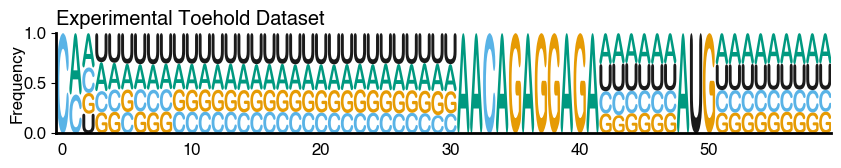

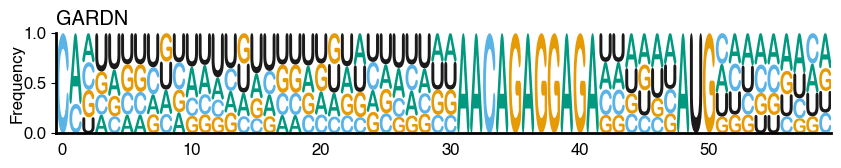

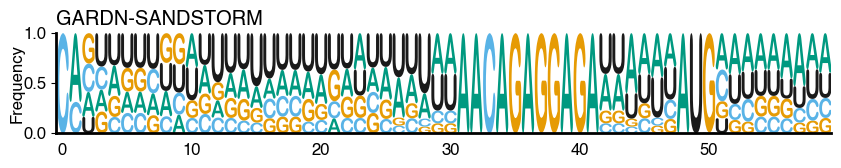

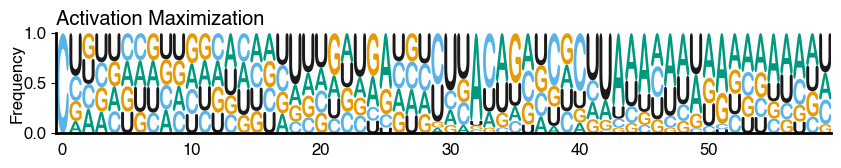

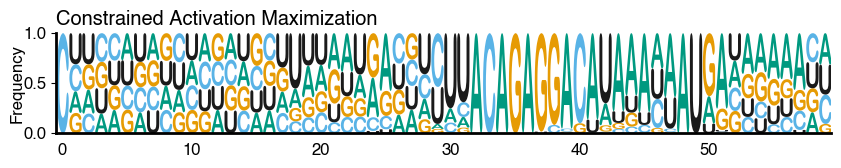

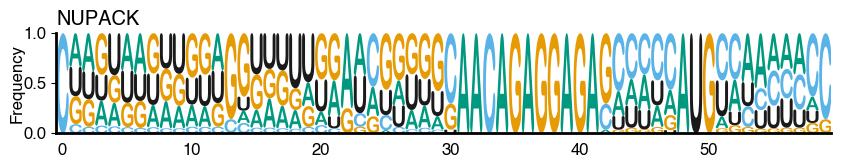

In [25]:
fs = [10,1.3]

plt.rcParams.update({'font.size': 12})
plt.hfont = {'fontname':'Helvetica'}

util.plot_logo(collins_seqs,title='',figsize=fs)
plt.title('Experimental Toehold Dataset',loc='left')

# plt.savefig('figures/seq_logos/total_toehold_dataset_seq_logo.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)


util.plot_logo(gardn_pre_seqs,title='',figsize=fs)
plt.title('GARDN',loc='left')
# plt.savefig('figures/seq_logos/gardn_pre_optimized_seq_logo.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)



util.plot_logo(gardn_post_seqs,title='',figsize=fs)
plt.title('GARDN-SANDSTORM',loc='left')

# plt.savefig('figures/seq_logos/gardn_post_optimized_seq_logo.png',dpi=500,bbox_inches='tight',transparent=True)
# plt.savefig('figures/seq_logos/gardn_post_optimized_seq_logo.svg',bbox_inches='tight',transparent=True)





util.plot_logo(trivial_act_max_seqs,title='',figsize=fs)
plt.title('Activation Maximization',loc='left')
# plt.savefig('figures/seq_logos/trivial_act_max_seq_logo.png',dpi=500,bbox_inches='tight',pad_inches=0.5,transparent=True)
# plt.savefig('figures/seq_logos/trivial_act_max_seq_logo.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)


util.plot_logo(constrained_act_max_seqs,title='',figsize=fs)
plt.title('Constrained Activation Maximization',loc='left')
# plt.savefig('figures/seq_logos/constrained_act_max_seq_logo.png',dpi=500,bbox_inches='tight',pad_inches=0.5,transparent=True)
# plt.savefig('figures/seq_logos/constrained_act_max_seq_logo.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)



util.plot_logo(nupack_seqs,title='',figsize=fs)
plt.title('NUPACK',loc='left')
# plt.savefig('figures/seq_logos/nupack_seq_logo.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)

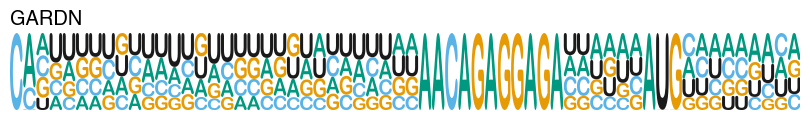

In [26]:
#Slight different formatting for sup fig 5
util.plot_logo(gardn_pre_seqs,title='',figsize=[10.2,1])
plt.title('GARDN',loc='left')
# plt.xlim([0,60])
plt.xticks([],labels=[])
plt.ylabel('')
plt.yticks([],labels=[])
plt.subplot().spines['left'].set_visible(False)
plt.subplot().spines['bottom'].set_visible(False)


# plt.savefig('figures/seq_logos/gardn_sup_5.png',dpi=500,bbox_inches='tight',pad_inches=0.5,transparent=True)
# plt.savefig('figures/seq_logos/gardn_sup_5.svg',bbox_inches='tight',pad_inches=0.5,transparent=True)

In [33]:
gardn_pre_prob = agreement.score_structure_against_consensus(gardn_pre_seqs,struc)
gardn_post_prob = agreement.score_structure_against_consensus(gardn_post_seqs,struc)
trivial_act_max_prob = agreement.score_structure_against_consensus(trivial_act_max_seqs,struc)
constrained_act_max_prob = agreement.score_structure_against_consensus(constrained_act_max_seqs,struc)
nupack_seq_prob = agreement.score_structure_against_consensus(nupack_seqs,struc)


# np.random.seed(9876)
idx = np.random.randint(0,collins_seqs.shape[0],1000)


                   
collins_seq_prob = agreement.score_structure_against_consensus(collins_seqs[idx,:,:],struc)



bar_lst = [nupack_seq_prob,collins_seq_prob,trivial_act_max_prob,constrained_act_max_prob,gardn_pre_prob,gardn_post_prob]

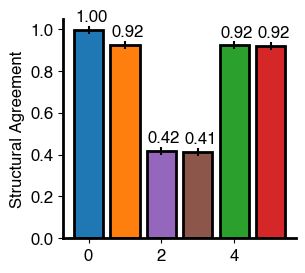

In [34]:
adjusted_color_list = ['C0','C1','C4','C5','C2','C3','C6']

plt.figure(figsize=(3,3))
plt.rcParams.update({'font.size': 12,'font.family':'Helvetica'})
# plt.title('Toehold Switch Structural Agreement')
for i in range(len(bar_lst)):
    plt.bar(i,bar_lst[i],alpha=1,edgecolor='black',linewidth=2,color=adjusted_color_list[i])

plt.scatter([i for i in range(len(bar_lst))],bar_lst,color='black',marker='|',label = ['%.2f'%i for i in bar_lst])
for i in range(len(bar_lst)):
    plt.annotate(text='%.2f'%bar_lst[i],xy=(i,bar_lst[i]),xytext=(i-0.37,bar_lst[i]+.04))

plt.ylabel('Structural Agreement')
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.0)
plt.subplot().spines['bottom'].set_linewidth(2.0)
plt.subplots_adjust(bottom=0.15)
# plt.xticks(ticks=[0,1,2,3,4,5],labels=['NUPACK','Experimental Toehold Dataset', 'Activation Maximization','Constrained Activation Maximization','GARDN','GARDN-SANDSTORM'],rotation=60,ha='right')
# plt.tight_layout()
# plt.savefig('figures/toehold_structure_probability.png',dpi=500,bbox_inches='tight',pad_inches=1,transparent=True)
# plt.savefig('figures/toehold_structure_probability.svg',transparent=True)



In [9]:
gardn_pre_trace = agreement.return_structural_comparison_trace(gardn_pre_seqs,struc)
gardn_post_trace = agreement.return_structural_comparison_trace(gardn_post_seqs,struc)
trivial_act_max_trace = agreement.return_structural_comparison_trace(trivial_act_max_seqs,struc)
constrained_act_max_trace = agreement.return_structural_comparison_trace(constrained_act_max_seqs,struc)
nupack_seq_trace = agreement.return_structural_comparison_trace(nupack_seqs,struc)
experimental_trace = agreement.return_structural_comparison_trace(collins_seqs[idx,:,:],struc)

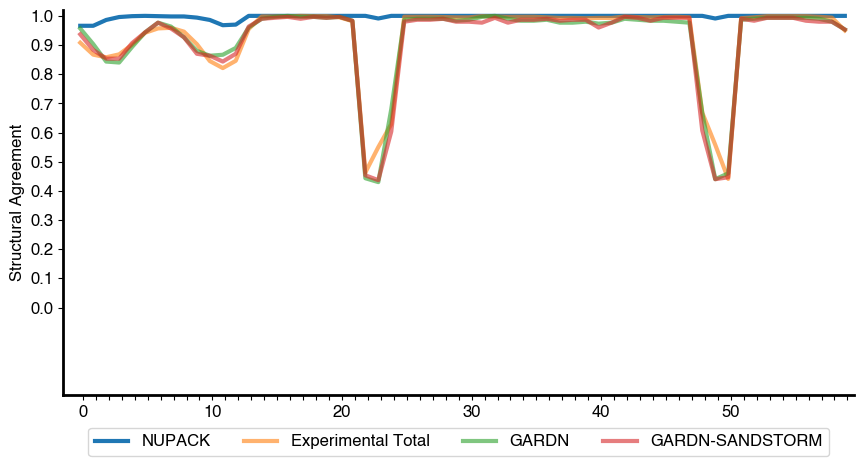

In [39]:
lw = 3
fs = [10.2,5]
space = 0.2 #for matching logo w/ trace

plt.figure(figsize=fs)
plt.plot([i-space for i in range(60)],nupack_seq_trace,label='NUPACK',lw=lw)
plt.plot([i-space for i in range(60)],experimental_trace,label='Experimental Total',lw=lw,alpha=0.6)


plt.plot([i-space for i in range(60)],gardn_pre_trace,label='GARDN',lw=lw,alpha=0.6)
plt.plot([i-space for i in range(60)],gardn_post_trace,label='GARDN-SANDSTORM',lw=lw,alpha=0.6)

# plt.plot(trivial_act_max_trace,label='Activation Maximization',lw=lw)
# plt.plot(constrained_act_max_trace,label='Constrained Activation Maximization',lw=lw)
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.0)
plt.subplot().spines['bottom'].set_linewidth(2.0)
plt.ylabel('Structural Agreement')
# plt.xlabel('Sequence Position')
# plt.xticks(ticks=[i*10 for i in range(60)],labels=[i*10 for i in range(60)])
plt.xticks(ticks=[i for i in range(60)],labels=[i if i%10==0 else '' for i in range(60)])
plt.yticks([0.1*(i) for i in range(11)],labels=['%.1f'%(0.1*(i)) for i in range(11)])
plt.legend(loc='lower center',ncol=4,bbox_to_anchor=(0.5,-0.18))
plt.xlim([-1.5,59.5])
plt.ylim([-0.3,1.02])
plt.savefig('figures/Structural Agreement Trace.svg',transparent=True,pad_inches=1)


0.37160169740517934


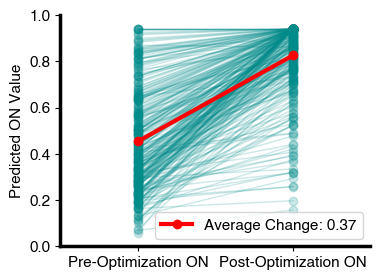

In [14]:
tick_1 = 0.25
tick_2 = 0.75

df = gardn_seqs

pre_mean = np.mean(df['Pre_Optimized_Value'])
post_mean = np.mean(df['Post_Optimized_Value'])
print(np.mean(df['Delta']))

plt.figure(figsize=(4,3))
plt.rcParams.update({'font.size': 11,'font.family':'Helvetica'})
plt.xticks(ticks=[tick_1,tick_2], labels=['Pre-Optimization ON','Post-Optimization ON'])
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.5)
plt.subplot().spines['bottom'].set_linewidth(2.5)
plt.ylabel('Predicted ON Value')
plt.xlim([0,1])
plt.ylim([0,1])
# plt.title('ON Value Optimization Results')
for i in range(df.shape[0]):
    plt.plot([tick_1,tick_2],[df.iloc[i,3],df.iloc[i,4]],color='darkcyan',alpha=0.2,marker='o',linewidth=1)
    
plt.plot([tick_1,tick_2],[pre_mean,post_mean],color='red',alpha=1,marker='o',linewidth=3,label='Average Change: %.2f'%(post_mean-pre_mean))
plt.legend()
plt.savefig('figures/toehold_on_act_max.svg',transparent=True,pad_inches=1)